In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install scipy
from scipy import stats
%store -r american_data
%store -r south_america_data
%store -r north_america_data
%store -r european_data
%store -r asian_data
%store -r african_data
%store -r oceanian_data

Below we can see european countries with the lowest and highest values, which we may consider as outliers.

In [49]:
for column in european_data.columns[2:]:
    max_country = european_data.loc[european_data[column].idxmax(
    )]["Country name"]
    min_country = european_data.loc[european_data[column].idxmin(
    )]["Country name"]

    print(f"Category: {column}")
    print(f"Max value: {max_country} ({european_data[column].max()})")
    print(f"Min value: {min_country} ({european_data[column].min()})")
    print()

Category: Life Ladder
Max value: Denmark (7.971)
Min value: Bulgaria (3.844)

Category: Log GDP per capita
Max value: Ireland (11.676)
Min value: Moldova (8.922)

Category: Social support
Max value: Iceland (0.985)
Min value: Albania (0.626)

Category: Healthy life expectancy at birth
Max value: Switzerland (73.3)
Min value: Moldova (59.48)

Category: Freedom to make life choices
Max value: Denmark (0.97)
Min value: Bosnia and Herzegovina (0.258)

Category: Generosity
Max value: Ukraine (0.408)
Min value: Greece (-0.34)

Category: Perceptions of corruption
Max value: Hungary (0.983)
Min value: Finland (0.132)

Category: Positive affect
Max value: Iceland (0.851)
Min value: Belarus (0.409)

Category: Negative affect
Max value: Greece (0.482)
Min value: Lithuania (0.132)



Let`s identify which year was the happiest for the countries in Europe.

In [50]:
columns_to_sum = european_data.columns[2:]

happiest_years = european_data.groupby(
    "Country name")[columns_to_sum].sum().idxmax(axis=1)

print("Happiest year for each european country:")
for country, year in happiest_years.items():
    print(
        f"{country}: {european_data.loc[european_data['Country name'] == country, 'year'].values[0]}")

Happiest year for each european country:
Albania: 2007
Austria: 2006
Belarus: 2006
Belgium: 2007
Bosnia and Herzegovina: 2007
Bulgaria: 2007
Croatia: 2007
Denmark: 2007
Estonia: 2006
Finland: 2006
France: 2006
Germany: 2007
Greece: 2007
Hungary: 2007
Iceland: 2008
Ireland: 2006
Italy: 2007
Latvia: 2006
Lithuania: 2006
Luxembourg: 2009
Malta: 2014
Moldova: 2006
Montenegro: 2007
Netherlands: 2007
North Macedonia: 2007
Norway: 2006
Poland: 2007
Portugal: 2006
Romania: 2007
Serbia: 2007
Slovakia: 2006
Slovenia: 2006
Spain: 2007
Sweden: 2007
Switzerland: 2006
Ukraine: 2006
United Kingdom: 2007


Europe went through a period of economic stability mainly from 2006 to 2007 before the financial crisi, with low unemployment and steady GDP growth. The robust social support systems and improved healthcare systems both enhanced the general state of well-being. A sense of security was further aided by low levels of corruption and political stability. During this period, a number of European nations experienced wealth and happiness due to the combined effects of these factors.

Let`s identify outliers in each region.

EUROPEAN OUTLIERS

In [51]:
# Find outliers based on Z-score threshold (e.g., Z-score > 3 or < -3)
z_scores = stats.zscore(european_data.iloc[:, 2:])

outliers_zscore = european_data[(z_scores > 3).any(
    axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers detected using Z-Score Method:")
print(outliers_zscore)

Outliers detected using Z-Score Method:
                Country name  year  Life Ladder  Log GDP per capita  \
21                   Albania  2014        4.814               9.358   
22                   Albania  2015        4.607               9.382   
23                   Albania  2016        4.511               9.417   
24                   Albania  2017        4.640               9.455   
25                   Albania  2018        5.004               9.497   
26                   Albania  2019        4.995               9.522   
30                   Albania  2023        5.445               9.689   
160                  Belarus  2006        5.658               9.489   
230   Bosnia and Herzegovina  2009        4.963               9.246   
236   Bosnia and Herzegovina  2015        5.117               9.428   
497                  Croatia  2014        5.381              10.091   
777                   Greece  2013        4.720              10.233   
1370                 Moldova  2006   

In [52]:
# Find outliers using IQR method
Q1 = european_data.iloc[:, 2:].quantile(0.25)
Q3 = european_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = european_data[((european_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (european_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
                Country name  year  Life Ladder  Log GDP per capita  \
17                   Albania  2010        5.269               9.283   
21                   Albania  2014        4.814               9.358   
22                   Albania  2015        4.607               9.382   
23                   Albania  2016        4.511               9.417   
24                   Albania  2017        4.640               9.455   
25                   Albania  2018        5.004               9.497   
26                   Albania  2019        4.995               9.522   
27                   Albania  2020        5.365               9.494   
28                   Albania  2021        5.255               9.588   
29                   Albania  2022        5.212               9.649   
30                   Albania  2023        5.445               9.689   
230   Bosnia and Herzegovina  2009        4.963               9.246   
232   Bosnia and He

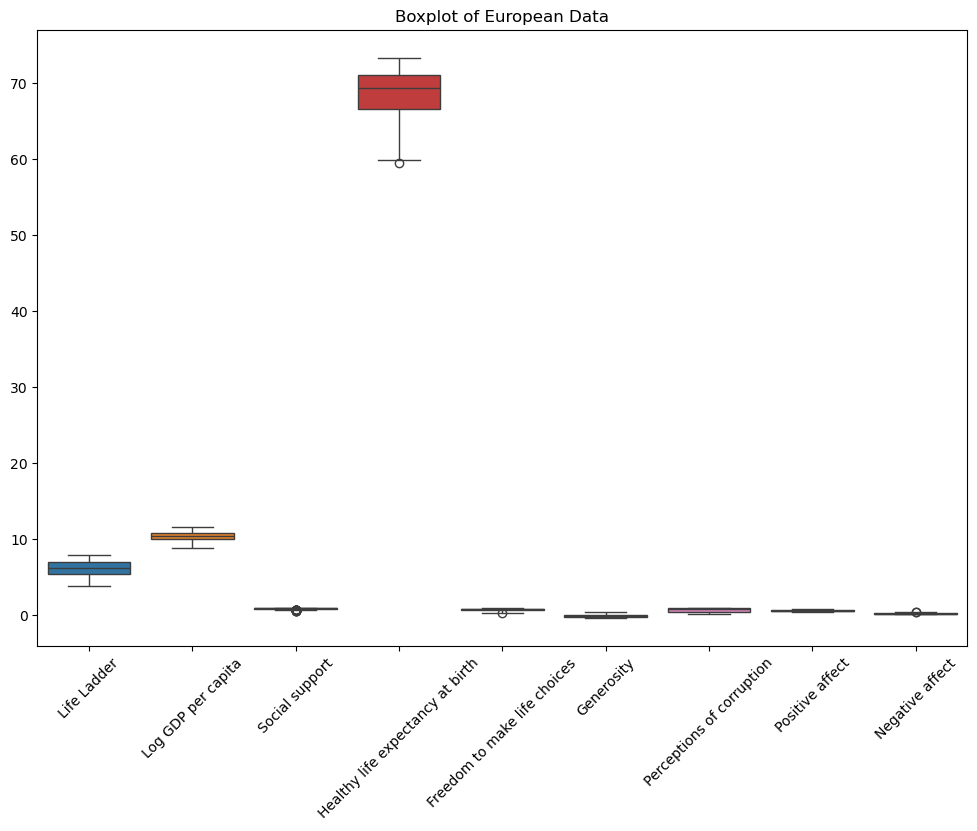

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=european_data.iloc[:, 2:])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

Let`s look closer at "Healthy life expectancy at birth", and investigate outliers here, as long as it has the most influence and data. Below you can see IQR test for outliers only in this column.

In [54]:
Q1 = european_data.iloc[:, 5].quantile(0.25)
Q3 = european_data.iloc[:, 5].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = european_data[(european_data.iloc[:, 5] < (
    Q1 - 1.5 * IQR)) | (european_data.iloc[:, 5] > (Q3 + 1.5 * IQR))]

print("Outliers detected using Interquartile Range (IQR) Method for column 5:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method for column 5:
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
1370      Moldova  2006        5.102               8.922           0.812   

      Healthy life expectancy at birth  Freedom to make life choices  \
1370                             59.48                         0.554   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
1370      -0.169                      0.926            0.553            0.255  


Here and for other regions also, you will observe the same method of exploring boxplots and their outliers. Up here, as a result of the test, we can say that Moldova is the only one outlier in Healthy life expectancy, having the value of almost 60 years of expectancy, which we can clearly see on the boxplot.

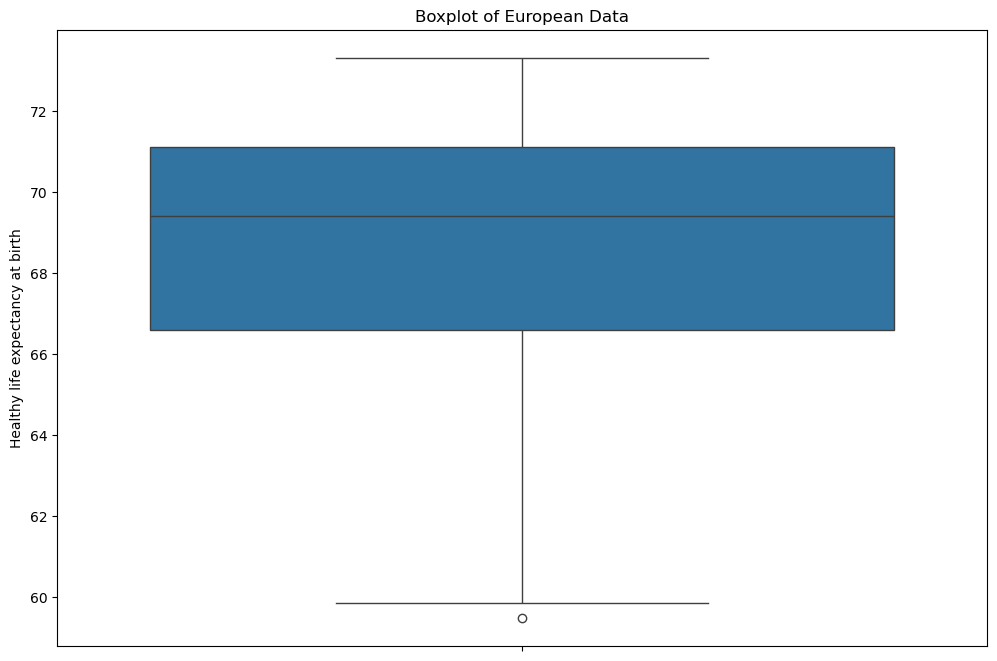

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=european_data.iloc[:, 5])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

NORTH AMERICAN OUTLIERS

In [3]:
for column in north_america_data.columns[2:]:
    max_country = north_america_data.loc[north_america_data[column].idxmax(
    )]["Country name"]
    min_country = north_america_data.loc[north_america_data[column].idxmin(
    )]["Country name"]

    print(f"Category: {column}")
    print(f"Max value: {max_country} ({north_america_data[column].max()})")
    print(f"Min value: {min_country} ({north_america_data[column].min()})")
    print()

Category: Life Ladder
Max value: Canada (7.65)
Min value: Haiti (3.352)

Category: Log GDP per capita
Max value: United States (11.089)
Min value: Haiti (7.976)

Category: Social support
Max value: Canada (0.962)
Min value: Haiti (0.538)

Category: Healthy life expectancy at birth
Max value: Canada (71.5)
Min value: Haiti (6.72)

Category: Freedom to make life choices
Max value: Canada (0.957)
Min value: Haiti (0.304)

Category: Generosity
Max value: Haiti (0.374)
Min value: Mexico (-0.208)

Category: Perceptions of corruption
Max value: Trinidad and Tobago (0.959)
Min value: Canada (0.362)

Category: Positive affect
Max value: Panama (0.86)
Min value: Haiti (0.495)

Category: Negative affect
Max value: Nicaragua (0.408)
Min value: Trinidad and Tobago (0.134)



In [56]:
# Find outliers based on Z-score threshold (e.g., Z-score > 3 or < -3)
z_scores = stats.zscore(north_america_data.iloc[:, 2:])

outliers_zscore = north_america_data[(z_scores > 3).any(
    axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers detected using Z-Score Method:")
print(outliers_zscore)

Outliers detected using Z-Score Method:
    Country name  year  Life Ladder  Log GDP per capita  Social support  \
360       Canada  2017        7.415              10.786           0.934   
818        Haiti  2006        3.754               7.976           0.694   
819        Haiti  2008        3.846               8.016           0.679   
820        Haiti  2010        3.766               7.987           0.554   
821        Haiti  2011        4.845               8.026           0.567   
822        Haiti  2012        4.413               8.015           0.749   
823        Haiti  2013        4.622               8.043           0.648   
824        Haiti  2014        3.889               8.057           0.554   
825        Haiti  2015        3.570               8.056           0.564   
826        Haiti  2016        3.352               8.060           0.584   
827        Haiti  2017        3.824               8.071           0.647   
828        Haiti  2018        3.615               8.074     

In [57]:
# Find outliers using IQR method
Q1 = north_america_data.iloc[:, 2:].quantile(0.25)
Q3 = north_america_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = north_america_data[((north_america_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (north_america_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
             Country name  year  Life Ladder  Log GDP per capita  \
349                Canada  2005        7.418              10.707   
351                Canada  2008        7.486              10.733   
352                Canada  2009        7.488              10.692   
353                Canada  2010        7.650              10.711   
354                Canada  2011        7.426              10.733   
355                Canada  2012        7.415              10.739   
356                Canada  2013        7.594              10.752   
357                Canada  2014        7.304              10.770   
358                Canada  2015        7.413              10.769   
359                Canada  2016        7.245              10.768   
360                Canada  2017        7.415              10.786   
361                Canada  2018        7.175              10.799   
362                Canada  2019        7.109              

After identifying outliers using z-score and IQR methods, we can clearly see that IQR method detect more outliers than z-score one. So from now on we will test regions by using IQR method only.

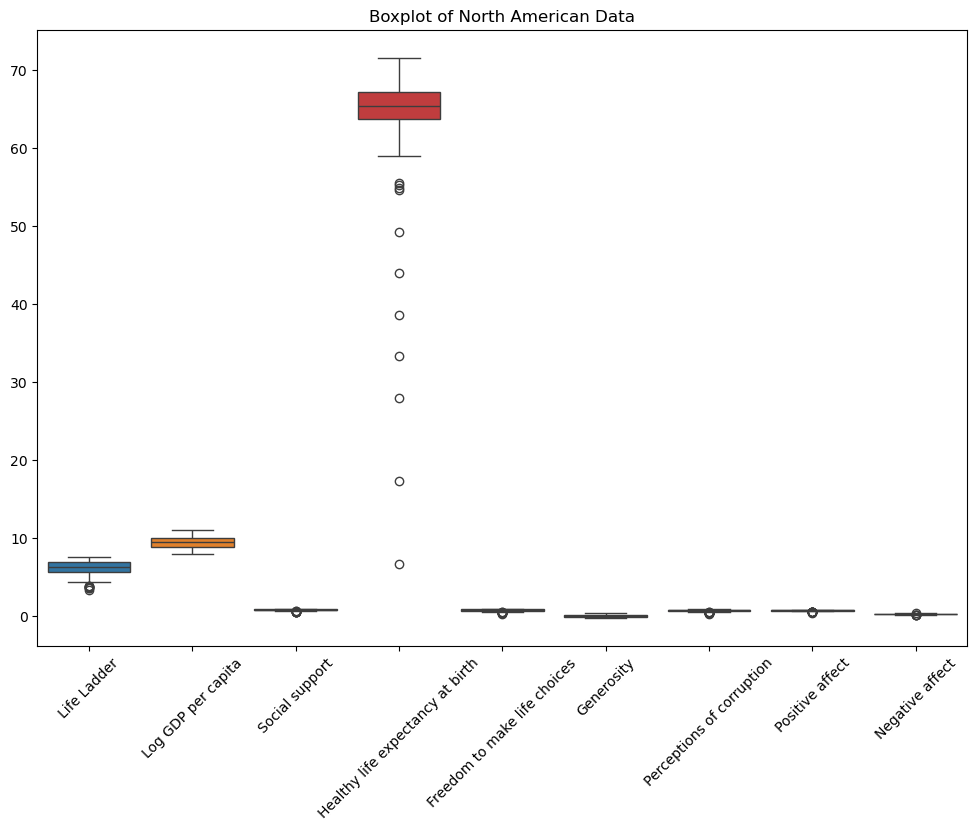

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=north_america_data.iloc[:, 2:])
plt.title('Boxplot of North American Data')
plt.xticks(rotation=45)
plt.show()

Here and in the following observations we will look at life expectancy, as it has the widest range of values and outliers.

In [59]:
Q1 = north_america_data.iloc[:, 5].quantile(0.25)
Q3 = north_america_data.iloc[:, 5].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = north_america_data[(north_america_data.iloc[:, 5] < (
    Q1 - 1.5 * IQR)) | (north_america_data.iloc[:, 5] > (Q3 + 1.5 * IQR))]

print("Outliers detected using Interquartile Range (IQR) Method for column 5:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method for column 5:
    Country name  year  Life Ladder  Log GDP per capita  Social support  \
818        Haiti  2006        3.754               7.976           0.694   
819        Haiti  2008        3.846               8.016           0.679   
820        Haiti  2010        3.766               7.987           0.554   
821        Haiti  2011        4.845               8.026           0.567   
822        Haiti  2012        4.413               8.015           0.749   
823        Haiti  2013        4.622               8.043           0.648   
824        Haiti  2014        3.889               8.057           0.554   
825        Haiti  2015        3.570               8.056           0.564   
826        Haiti  2016        3.352               8.060           0.584   
827        Haiti  2017        3.824               8.071           0.647   
828        Haiti  2018        3.615               8.074           0.538   

     Healthy life expectancy

As a result of the test, we can say that Haiti is the outlier in Healthy life expectancy, having multiple values in a range of 6 - 55 years expectancy, which we can clearly see on the boxplot. Life expectancy of a 6-7 even 17 years is terrifying, but 28-55 is also pretty low. We may relate it to very poor medicine and life ladder, as it is even below the average generally accepted level(5-6).

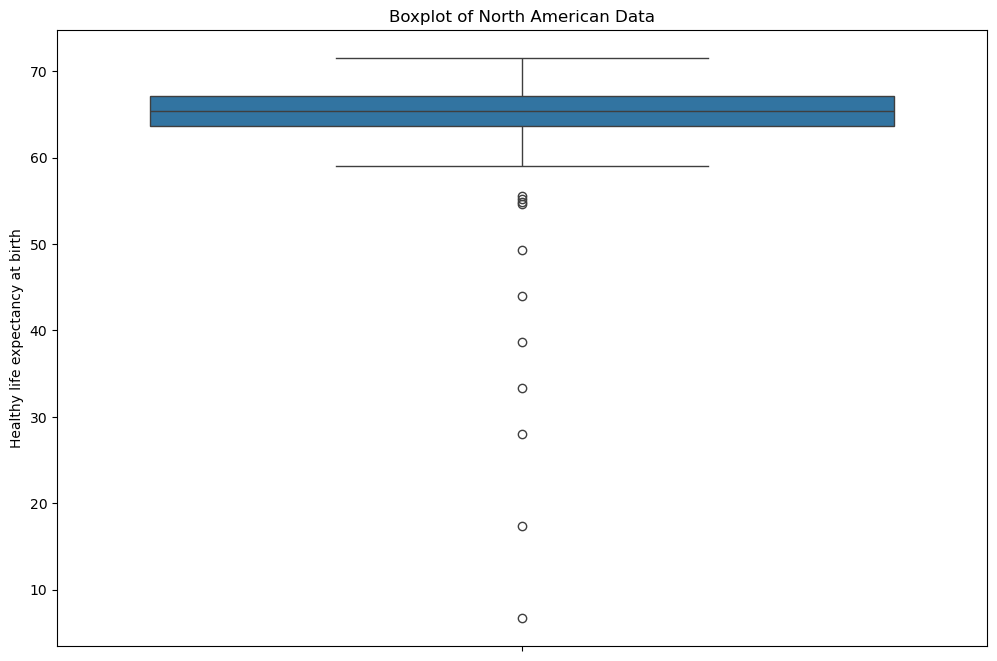

In [86]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=north_america_data.iloc[:, 5])
plt.title('Boxplot of North American Data')
plt.xticks(rotation=45)
plt.show()

SOUTH AMERICAN OUTLIERS

In [4]:
for column in south_america_data.columns[2:]:
    max_country = south_america_data.loc[south_america_data[column].idxmax(
    )]["Country name"]
    min_country = south_america_data.loc[south_america_data[column].idxmin(
    )]["Country name"]

    print(f"Category: {column}")
    print(f"Max value: {max_country} ({south_america_data[column].max()})")
    print(f"Min value: {min_country} ({south_america_data[column].min()})")
    print()

Category: Life Ladder
Max value: Venezuela (7.478)
Min value: Venezuela (4.041)

Category: Log GDP per capita
Max value: Chile (10.161)
Min value: Venezuela (5.527)

Category: Social support
Max value: Paraguay (0.959)
Min value: Peru (0.749)

Category: Healthy life expectancy at birth
Max value: Chile (70.6)
Min value: Guyana (56.24)

Category: Freedom to make life choices
Max value: Paraguay (0.922)
Min value: Venezuela (0.458)

Category: Generosity
Max value: Chile (0.236)
Min value: Venezuela (-0.235)

Category: Perceptions of corruption
Max value: Peru (0.931)
Min value: Uruguay (0.471)

Category: Positive affect
Max value: Paraguay (0.876)
Min value: Brazil (0.653)

Category: Negative affect
Max value: Peru (0.481)
Min value: Venezuela (0.13)



In [61]:
# Find outliers using IQR method
Q1 = south_america_data.iloc[:, 2:].quantile(0.25)
Q3 = south_america_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = south_america_data[((south_america_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (south_america_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
211       Bolivia  2006        5.374               8.671           0.834   
388         Chile  2006        6.063               9.870           0.836   
389         Chile  2007        5.698               9.910           0.815   
391         Chile  2009        6.494               9.916           0.832   
394         Chile  2012        6.599              10.063           0.855   
396         Chile  2014        6.844              10.094           0.862   
817        Guyana  2007        5.993               9.089           0.849   
1636     Paraguay  2011        5.677               9.360           0.869   
1637     Paraguay  2012        5.820               9.339           0.931   
1662         Peru  2020        4.994               9.323           0.749   
2243      Uruguay  2006        5.786               9.640           0.912   
2246      Uruguay  2009       

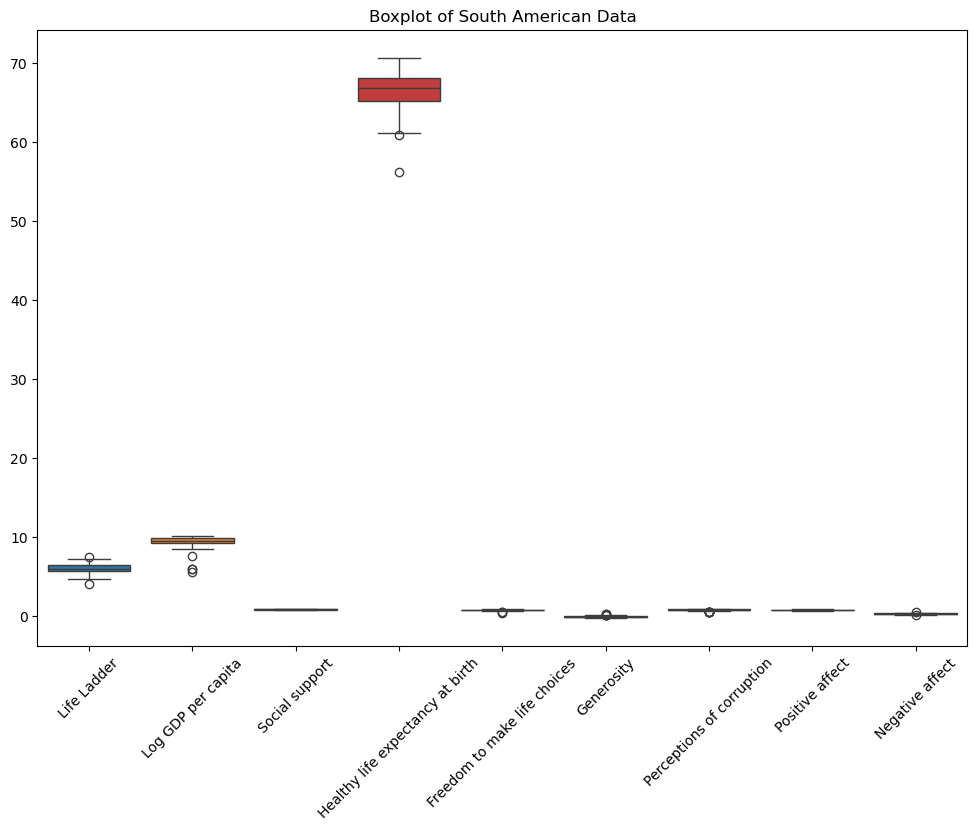

In [85]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=south_america_data.iloc[:, 2:])
plt.title('Boxplot of South American Data')
plt.xticks(rotation=45)
plt.show()

In [63]:
Q1 = south_america_data.iloc[:, 5].quantile(0.25)
Q3 = south_america_data.iloc[:, 5].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = south_america_data[(south_america_data.iloc[:, 5] < (
    Q1 - 1.5 * IQR)) | (south_america_data.iloc[:, 5] > (Q3 + 1.5 * IQR))]

print("Outliers detected using Interquartile Range (IQR) Method for column 5:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method for column 5:
    Country name  year  Life Ladder  Log GDP per capita  Social support  \
211      Bolivia  2006        5.374               8.671           0.834   
817       Guyana  2007        5.993               9.089           0.849   

     Healthy life expectancy at birth  Freedom to make life choices  \
211                             60.90                         0.770   
817                             56.24                         0.694   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
211      -0.048                      0.794            0.708            0.432  
817       0.082                      0.836            0.761            0.296  


Bolivia and Guyana are outliers in Healthy life expectancy, having a couple of values around 60 and 56 years, accordingly, which we can clearly see on the boxplot.

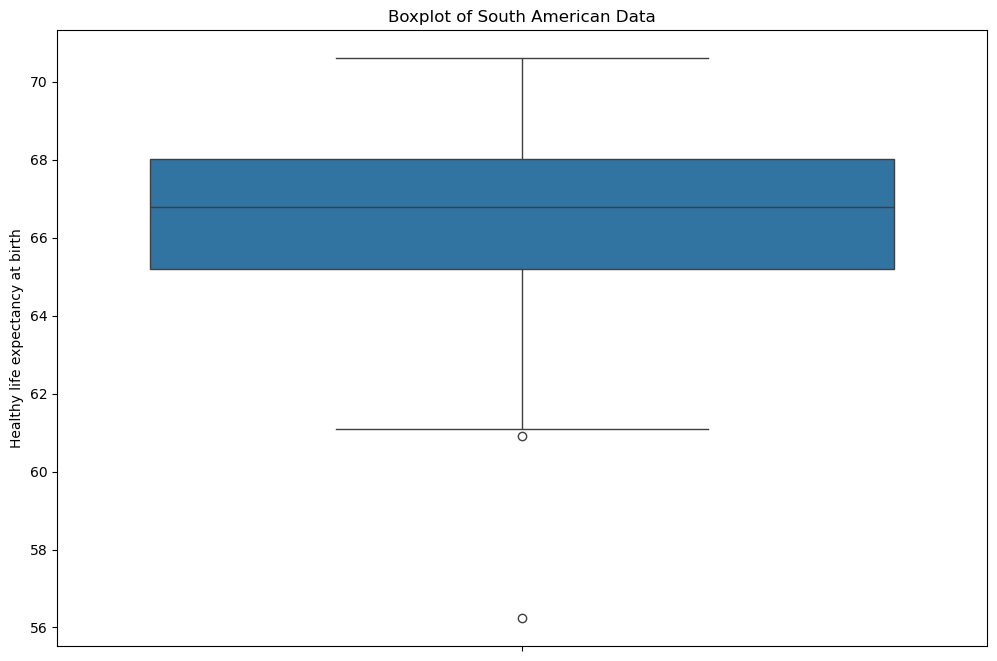

In [84]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=south_america_data.iloc[:, 5])
plt.title('Boxplot of South American Data')
plt.xticks(rotation=45)
plt.show()

Now let`s move to comparison. Which region is happier overall ? Europe or America ?

In [77]:
european_column_sums = european_data.iloc[:, 2:].sum()

american_column_sums = american_data.iloc[:, 2:].sum()

european_sum = european_data.iloc[:, 2:].sum(axis=1).sum()

american_sum = american_data.iloc[:, 2:].sum(axis=1).sum()

if european_sum > american_sum:
    print("Europe is happier overall.")
elif american_sum > european_sum:
    print("America is happier overall.")
else:
    print("Europe and America have the same level of happiness.")

print()

print("Sum of values for each column in Europe:")
print()
print(european_column_sums)

print()

print("Sum of values for each column in America:")
print()
print(american_column_sums)

Europe is happier overall.

Sum of values for each column in Europe:

Life Ladder                          3599.410
Log GDP per capita                   6008.762
Social support                        516.512
Healthy life expectancy at birth    39754.380
Freedom to make life choices          444.262
Generosity                             -8.151
Perceptions of corruption             404.405
Positive affect                       372.333
Negative affect                       145.539
dtype: float64

Sum of values for each column in America:

Life Ladder                          2282.073
Log GDP per capita                   3545.181
Social support                        319.045
Healthy life expectancy at birth    24374.915
Freedom to make life choices          296.894
Generosity                             -7.002
Perceptions of corruption             285.788
Positive affect                       284.458
Negative affect                       106.873
dtype: float64


QUESTION

Provide recommendations for a hypothetical scenario where a US citizen is considering moving to Europe, specifically to countries like Poland, Norway, or Italy. Discuss the advantages and disadvantages of staying in the US versus moving to these European countries.

In [78]:
countries = ['Poland', 'Norway', 'Italy']

selected_countries_data = european_data[european_data['Country name'].isin(
    countries)].copy()

selected_countries_data.loc[:,'Happiness Level'] = selected_countries_data.iloc[:, 2:].sum(axis=1)

for country in countries:
    country_data = selected_countries_data[selected_countries_data['Country name'] == country]
    happiness_level = country_data['Happiness Level'].values[0]
    print(f"Happiness Level for {country}: {happiness_level}")
    print()
    for column in european_data.columns[2:]:
        column_value = country_data[column].values[0]
        print(f"{column}: {column_value}")
    print()

Happiness Level for Poland: 85.87900000000002

Life Ladder: 5.886
Log GDP per capita: 9.973
Social support: 0.913
Healthy life expectancy at birth: 66.56
Freedom to make life choices: 0.772
Generosity: -0.053
Perceptions of corruption: 0.925
Positive affect: 0.665
Negative affect: 0.238

Happiness Level for Norway: 91.253

Life Ladder: 7.416
Log GDP per capita: 11.056
Social support: 0.959
Healthy life expectancy at birth: 69.4
Freedom to make life choices: 0.96
Generosity: 0.101
Perceptions of corruption: 0.397
Positive affect: 0.767
Negative affect: 0.197

Happiness Level for Italy: 91.675

Life Ladder: 6.574
Log GDP per capita: 10.722
Social support: 0.912
Healthy life expectancy at birth: 70.8
Freedom to make life choices: 0.684
Generosity: 0.108
Perceptions of corruption: 0.922
Positive affect: 0.65
Negative affect: 0.303



For American citizens who are thinking of relocating to Europe—more especially, to Poland, Norway, or Italy—the following overview is based on indicators of living quality and happiness:

Poland provides high social support (0.922) and a respectable level of happiness (Life Ladder: 5.587). On the other hand, it has lesser positive affect (0.611) and higher views of corruption (0.983). The average healthy life expectancy is 66.2 years.

With a high life expectancy (69.4 years), a solid social support system (0.959), an exceptional GDP per capita (11.056), and a high happiness score (7.416), Norway stands out. Strong points include low perceptions of corruption (0.397) and personal freedom (0.96), yet living expenses are considerable.

Italy provides the longest healthy life expectancy (70.6 years) and balanced happiness (6.854). Robust societal backing (0.928) and moderate individual autonomy (0.802). Nonetheless, its perception of corruption is higher (0.944).

Comparing: The US has a more varied employment market and higher incomes than other countries, but it also frequently scores lower on social support and personal freedom. Access to healthcare can be a sensitive topic.

Recommendations:

Norway: The best country for people looking for strong social support, individual freedom, and good health.

Italy: A good choice for people who value cultural experiences and good health.

Poland: Its rising economy and affordability make it appealing.

Compared to the US, every country offers distinct advantages that could result in a happier and more satisfying existence.